### Analisis de Corriente Oscura en función de la Temperatura

In [1]:
# Imports
from astropy import units as u
from astropy.nddata import CCDData
import ccdproc 
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Defines
images_dir = './'

In [2]:
# images loading
images = ccdproc.ImageFileCollection(images_dir)
images.summary

<Table masked=True length=11>
               file               simple bitpix naxis ... extend combined bunit 
              str33                bool  int32  int32 ... object  object  object
--------------------------------- ------ ------ ----- ... ------ -------- ------
QHY174M_B50-G0-0001-Dark-T-10.fit   True     16     2 ...     --       --     --
QHY174M_B50-G0-0001-Dark-T-15.fit   True     16     2 ...     --       --     --
QHY174M_B50-G0-0001-Dark-T-20.fit   True     16     2 ...     --       --     --
  QHY174M_B50-G0-0001-Dark-T0.fit   True     16     2 ...     --       --     --
 QHY174M_B50-G0-0001-Dark-T10.fit   True     16     2 ...     --       --     --
 QHY174M_B50-G0-0001-Dark-T15.fit   True     16     2 ...     --       --     --
 QHY174M_B50-G0-0001-Dark-T20.fit   True     16     2 ...     --       --     --
 QHY174M_B50-G0-0001-Dark-T25.fit   True     16     2 ...     --       --     --
 QHY174M_B50-G0-0001-Dark-T5a.fit   True     16     2 ...     --       --     --
 QHY174M_B50-G0-0002-Dark-T-5.fit   True     16     2 ...     --       --     --
                 master_bias.fits   True    -64     2 ...   True     True    adu

In [3]:
# Correct darks for bias

master_bias = CCDData.read(images.files_filtered(imagetyp = 'Bias Frame', combined=True, include_path=True)[0], unit=u.adu)
darks = images.filter(imagetyp = 'Dark Frame')

corrected_darks = [ccdproc.subtract_bias(ccd, master_bias)  # Bias correction
                   for ccd in darks.ccds(ccd_kwargs={'unit': u.adu})]
    
  

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [4]:
# Mean valua and STD computation

#ccd_temp = sorted(darks.values('ccd-temp', unique=True))
ccd_temp = []
dc_mean = []
dc_std =  []
for i in range(len(corrected_darks)):
    ccd_temp.append(corrected_darks[i].meta['ccd-temp'])
    
    a_dark = corrected_darks[i].data
    dc_mean.append(np.average(a_dark))
    dc_std.append(np.std(a_dark))

In [5]:
df = pd.DataFrame(data={'Temp': ccd_temp, 'Mean DC':dc_mean, 'STD DC':dc_std})
df.sort_values('Temp', inplace=True)
df.reset_index(inplace=True, drop=True)
df

Temp    Mean DC      STD DC
0 -19.9  35.554781   26.705469
1 -15.0  35.322649   28.007715
2  -9.8  35.769684   34.432895
3  -4.9  36.392427   42.618395
4   0.0  37.157774   51.817475
5   6.0  40.403656   71.945265
6  10.5  45.818608   92.881747
7  14.8  58.128781  123.741822
8  20.6  79.211094  155.045205
9  23.0  98.428608  188.285593

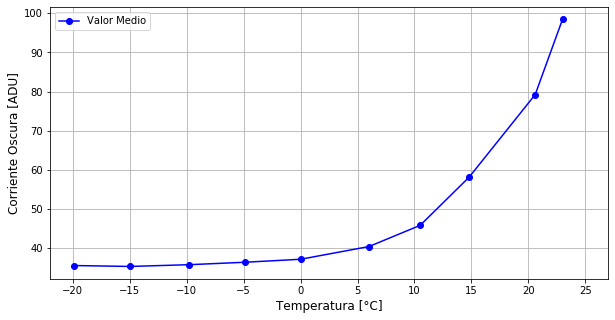

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(df['Temp'],df['Mean DC'], 'o-b', label = 'Valor Medio')
plt.xlim([-22, 27])
plt.xticks(np.arange(-20, 30, 5))
plt.xlabel("Temperatura [°C]", fontsize=12)
plt.ylabel("Corriente Oscura [ADU]", fontsize=12)
plt.legend()
plt.grid()

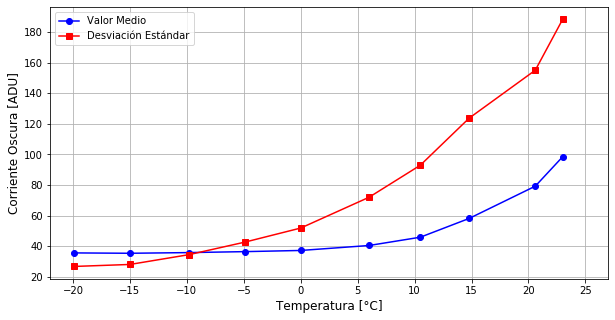

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(df['Temp'],df['Mean DC'], 'o-b', label = 'Valor Medio')
plt.plot(df['Temp'],df['STD DC'], 's-r', label = 'Desviación Estándar')
plt.xlim([-22, 27])
plt.xticks(np.arange(-20, 30, 5))
plt.xlabel("Temperatura [°C]", fontsize=12)
plt.ylabel("Corriente Oscura [ADU]", fontsize=12)
plt.legend()
plt.grid()